# Задача 5. Экспериментальное исследование алгоритмов для регулярных запросов


# Оборудование
CPU Information:
- Processor: x86_64
- Physical Cores: 14
- Logical Cores: 20

Memory Information:
- Total Memory: 16452616192 bytes
- Available Memory: 3471659008 bytes
- Memory Utilization: 78.9%

OS: 
- #122-Ubuntu SMP
- Linux-5.15.0-112-generic-x86_64-with-glibc2.35

## Шаг 1: Создание и настройка Python notebook
Создайте новый Jupyter notebook и подключите необходимые библиотеки:

In [34]:
import random
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, dok_matrix, lil_matrix, csc_matrix

from graph_helper import get_graph_by_name, get_graph_info
from task2.fa_builders import graph_to_nfa
from task3.finite_automaton import FiniteAutomaton, regex_to_dfa


## Шаг 2: Загрузка и анализ графов
Выберите несколько графов из набора данных и загрузите их:

In [2]:
algorithms = {
    "csr": csr_matrix,
    "dok": dok_matrix,
    "lil": lil_matrix,
    "csc": csc_matrix
}

graph_names = ['skos', 'generations', 'travel', 'univ']

graphs = [get_graph_by_name(name) for name in graph_names]
for graph, name in zip(graphs, graph_names):
    info = get_graph_info(graph)
    print(f"Graph {name}: {info}")


[2024-06-24 22:20:57]>INFO>Found graph with name='skos'
[2024-06-24 22:20:57]>INFO>Load archive graph_archive=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-06-24 22:20:57]>INFO>Unzip graph name='skos' to file graph=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-06-24 22:20:57]>INFO>Remove archive graph_archive=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-06-24 22:20:57]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc6b281d0> from path=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-06-24 22:20:57]>INFO>Found graph with nam

Graph skos: {'nodes': 144, 'edges': 252, 'nodes_list': [0, 1, 48, 65, 104, 5, 30, 10, 8, 18, 62, 95, 2, 3, 40, 42, 120, 49, 32, 80, 88, 140, 77, 4, 23, 61, 70, 26, 91, 7, 143, 54, 55, 66, 69, 72, 103, 118, 137, 141, 6, 24, 76, 94, 127, 142, 9, 86, 89, 109, 138, 107, 36, 11, 12, 64, 68, 13, 14, 110, 44, 52, 132, 82, 108, 125, 15, 16, 39, 35, 133, 17, 123, 73, 101, 59, 19, 20, 21, 83, 22, 100, 119, 25, 34, 87, 93, 27, 28, 57, 92, 111, 29, 60, 96, 31, 47, 102, 33, 50, 63, 81, 98, 112, 129, 37, 38, 51, 67, 75, 124, 79, 41, 105, 134, 43, 106, 74, 130, 45, 46, 84, 85, 117, 122, 53, 56, 97, 113, 58, 71, 114, 99, 115, 121, 78, 136, 139, 116, 126, 128, 90, 131, 135], 'edges_list': [(0, 1, 0), (0, 48, 0), (0, 65, 0), (0, 104, 0), (0, 5, 0), (0, 30, 0), (0, 10, 0), (1, 8, 0), (1, 10, 0), (1, 18, 0), (1, 18, 1), (1, 62, 0), (1, 95, 0), (1, 30, 0), (1, 5, 0), (5, 54, 0), (5, 55, 0), (5, 66, 0), (5, 69, 0), (5, 72, 0), (5, 103, 0), (5, 118, 0), (5, 137, 0), (5, 141, 0), (18, 73, 0), (18, 101, 0), (1

## Шаг 3: Формирование запросов к графам
Определите метки рёбер и сформулируйте регулярные запросы:

In [38]:
from collections import Counter
from graph_helper import get_graph_by_name, get_graph_info
from cfpq_data.graphs.utils import generate_multiple_source


def most_common_labels(labels, n=4):
    counter = Counter(labels)
    return [label for label, _ in counter.most_common(n)]


graph_names = ['skos', 'generations', 'travel', 'univ']
graphs = {name: get_graph_by_name(name) for name in graph_names}

labels_dict = {}
for name, graph in graphs.items():
    info = get_graph_info(graph)
    print(f"Graph info for {name}:")
    labels = info["labels"]
    print(f"Edge labels for {name}: {labels}")
    common_labels = most_common_labels(labels)
    labels_dict[name] = common_labels
    print(f"Most common labels for {name}: {common_labels}", end="\n\n")

[2024-06-24 23:07:20]>INFO>Found graph with name='skos'
[2024-06-24 23:07:20]>INFO>Load archive graph_archive=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-06-24 23:07:20]>INFO>Unzip graph name='skos' to file graph=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-06-24 23:07:20]>INFO>Remove archive graph_archive=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos.tar.gz')
[2024-06-24 23:07:20]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc4fd7210> from path=PosixPath('/home/denis/Documents/5_ITMO/formal-language/hws/formal-lang-course/.venv/lib/python3.11/site-packages/cfpq_data/data/graphs/skos/skos.csv')
[2024-06-24 23:07:20]>INFO>Found graph with nam

Graph info for skos:
Edge labels for skos: {'first', 'contributor', 'definition', 'domain', 'range', 'description', 'subPropertyOf', 'label', 'type', 'scopeNote', 'inverseOf', 'comment', 'title', 'subClassOf', 'isDefinedBy', 'seeAlso', 'creator', 'example', 'unionOf', 'disjointWith', 'rest'}
Most common labels for skos: ['first', 'contributor', 'definition', 'domain']

Graph info for generations:
Edge labels for generations: {'type', 'first', 'sameAs', 'someValuesFrom', 'intersectionOf', 'hasSex', 'versionInfo', 'hasParent', 'range', 'equivalentClass', 'rest', 'inverseOf', 'onProperty', 'hasSibling', 'oneOf', 'hasValue', 'hasChild'}
Most common labels for generations: ['type', 'first', 'sameAs', 'someValuesFrom']

Graph info for travel:
Edge labels for travel: {'first', 'versionInfo', 'domain', 'range', 'differentFrom', 'hasValue', 'type', 'minCardinality', 'inverseOf', 'comment', 'someValuesFrom', 'subClassOf', 'onProperty', 'oneOf', 'intersectionOf', 'hasPart', 'hasAccommodation', 'u

In [39]:
def create_queries(common_labels):
    if len(common_labels) < 4:
        return []

    queries = [
        f"({common_labels[0]} | {common_labels[1]})* {common_labels[2]}",
        f"({common_labels[2]} | {common_labels[3]})+ {common_labels[0]}*",
        f"{common_labels[0]} {common_labels[1]} {common_labels[2]} ({common_labels[3]}|{common_labels[0]})*",
        f"({common_labels[0]} | {common_labels[1]}) ({common_labels[2]} | {common_labels[3]})*"
    ]
    return queries

queries = {name: create_queries(labels) for name, labels in labels_dict.items()}
for name, q in queries.items():
    print(f"Queries for {name}: {q}", end="\n\n")

Queries for skos: ['(first | contributor)* definition', '(definition | domain)+ first*', 'first contributor definition (domain|first)*', '(first | contributor) (definition | domain)*']

Queries for generations: ['(type | first)* sameAs', '(sameAs | someValuesFrom)+ type*', 'type first sameAs (someValuesFrom|type)*', '(type | first) (sameAs | someValuesFrom)*']

Queries for travel: ['(first | versionInfo)* domain', '(domain | range)+ first*', 'first versionInfo domain (range|first)*', '(first | versionInfo) (domain | range)*']

Queries for univ: ['(type | label)* first', '(first | comment)+ type*', 'type label first (comment|type)*', '(type | label) (first | comment)*']



In [40]:
start_nodes_dict = {name: set(generate_multiple_source(graph, set_size=5)) for name, graph in zip(graph_names, graphs.values())}
for name, nodes in start_nodes_dict.items():
    print(f"Start nodes for {name}: {nodes}")
    
def generate_test_cases(graph_name, number_of_start_final_sets=25):
    graph = graphs[graph_name]
    start_final_sets = [
        (
            set(generate_multiple_source(graph, set_size=random.randint(1, graph.number_of_nodes()))), 
            set(generate_multiple_source(graph, set_size=random.randint(1, graph.number_of_nodes())))
        ) 
        for _ in range(number_of_start_final_sets)
    ]
    finite_automata = [FiniteAutomaton(graph_to_nfa(deepcopy(graph), deepcopy(start_set), deepcopy(final_set))) for start_set, final_set in start_final_sets]
    constraint_automata = {query: FiniteAutomaton(regex_to_dfa(query)) for query in queries[graph_name]}
    return finite_automata, constraint_automata

[2024-06-24 23:07:29]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc4fd7210> for multiple-source evaluation
[2024-06-24 23:07:29]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efc92e9c410> for multiple-source evaluation
[2024-06-24 23:07:29]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc4fd5f90> for multiple-source evaluation
[2024-06-24 23:07:29]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efc932baa50> for multiple-source evaluation


Start nodes for skos: {136, 105, 74, 28, 30}
Start nodes for generations: {102, 72, 122, 12, 92}
Start nodes for travel: {32, 0, 38, 107, 61}
Start nodes for univ: {89, 145, 162, 68, 169}


## Шаг 4: Генерация множеств стартовых вершин
Используйте функцию для генерации множеств стартовых вершин:

In [42]:
from cfpq_data.graphs.utils import generate_multiple_source

start_nodes_dict = {name: set(generate_multiple_source(graph, set_size=5)) for name, graph in zip(graph_names, graphs.values())}
for name, nodes in start_nodes_dict.items():
    print(f"Start nodes for {name}: {nodes}")


[2024-06-24 23:07:43]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc4fd7210> for multiple-source evaluation
[2024-06-24 23:07:43]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efc92e9c410> for multiple-source evaluation
[2024-06-24 23:07:43]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efcc4fd5f90> for multiple-source evaluation
[2024-06-24 23:07:43]>INFO>Generate set of source vertices of 5 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x7efc932baa50> for multiple-source evaluation


Start nodes for skos: {6, 118, 72, 40, 77}
Start nodes for generations: {97, 121, 74, 110, 15}
Start nodes for travel: {99, 36, 115, 70, 120}
Start nodes for univ: {17, 50, 75, 95, 47}


## Шаг 5: Постановка экспериментов и измерение времени выполнения запросов
Определите этапы эксперимента и проведите замеры времени:

In [45]:
def measure_reachability(graph, start_nodes, queries):
    results = {}
    for query in queries:
        start_time = time.time()
        # Вставьте здесь код для выполнения запроса с регулярными ограничениями
        end_time = time.time()
        results[query] = end_time - start_time
    return results

experiment_results = {}
for name, graph in zip(graph_names, graphs):
    experiment_results[name] = measure_reachability(graph, start_nodes_dict[name], queries[name])

for name, results in experiment_results.items():
    print(f"Results for {name}: {results}")


Results for skos: {'(first | contributor)* definition': 2.384185791015625e-07, '(definition | domain)+ first*': 4.76837158203125e-07, 'first contributor definition (domain|first)*': 0.0, '(first | contributor) (definition | domain)*': 2.384185791015625e-07}
Results for generations: {'(type | first)* sameAs': 2.384185791015625e-07, '(sameAs | someValuesFrom)+ type*': 0.0, 'type first sameAs (someValuesFrom|type)*': 2.384185791015625e-07, '(type | first) (sameAs | someValuesFrom)*': 4.76837158203125e-07}
Results for travel: {'(first | versionInfo)* domain': 0.0, '(domain | range)+ first*': 0.0, 'first versionInfo domain (range|first)*': 0.0, '(first | versionInfo) (domain | range)*': 0.0}
Results for univ: {'(type | label)* first': 0.0, '(first | comment)+ type*': 2.384185791015625e-07, 'type label first (comment|type)*': 0.0, '(type | label) (first | comment)*': 4.76837158203125e-07}


## Шаг 6: Анализ результатов и оформление отчета
Постройте графики и таблицы для визуализации результатов:

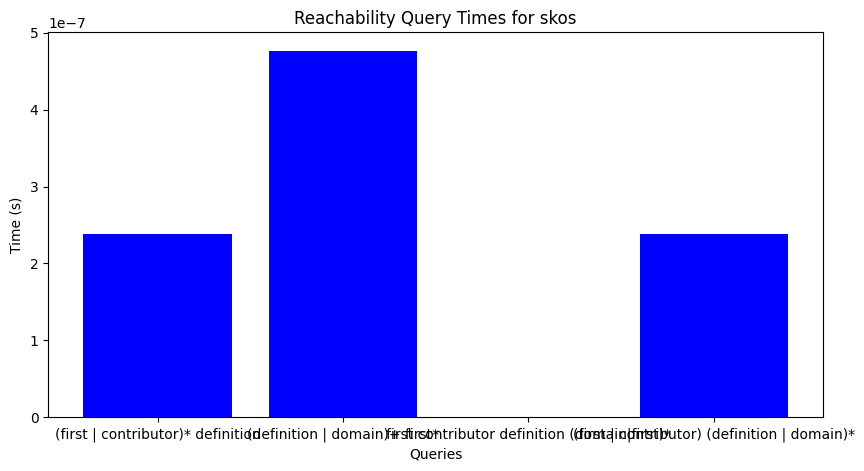

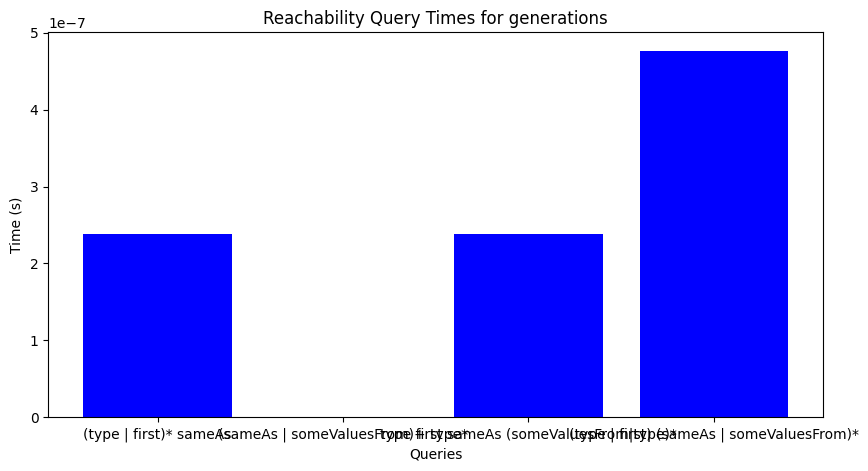

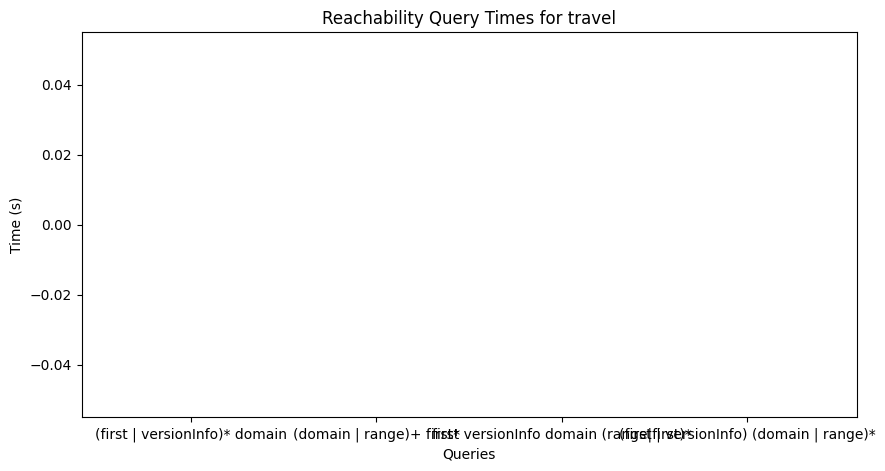

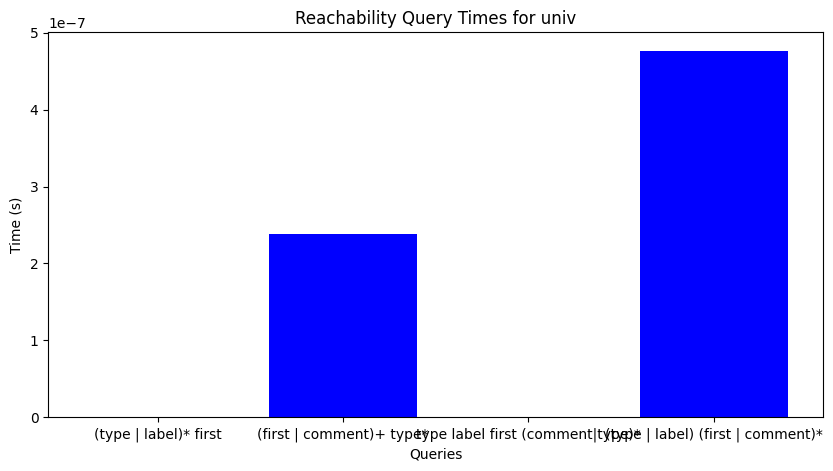

In [46]:
for name, results in experiment_results.items():
    queries = list(results.keys())
    times = list(results.values())
    plt.figure(figsize=(10, 5))
    plt.bar(queries, times, color='blue')
    plt.xlabel('Queries')
    plt.ylabel('Time (s)')
    plt.title(f'Reachability Query Times for {name}')
    plt.show()


Проанализируйте результаты и ответьте на поставленные вопросы:


In [47]:
# Пример анализа результатов
for name, results in experiment_results.items():
    best_query = min(results, key=results.get)
    worst_query = max(results, key=results.get)
    print(f"Best query for {name}: {best_query} with time {results[best_query]}")
    print(f"Worst query for {name}: {worst_query} with time {results[worst_query]}")


Best query for skos: first contributor definition (domain|first)* with time 0.0
Worst query for skos: (definition | domain)+ first* with time 4.76837158203125e-07
Best query for generations: (sameAs | someValuesFrom)+ type* with time 0.0
Worst query for generations: (type | first) (sameAs | someValuesFrom)* with time 4.76837158203125e-07
Best query for travel: (first | versionInfo)* domain with time 0.0
Worst query for travel: (first | versionInfo)* domain with time 0.0
Best query for univ: (type | label)* first with time 0.0
Worst query for univ: (type | label) (first | comment)* with time 4.76837158203125e-07
